/Users/ishankalburge/Documents/JOHNS-HOPKINS/3_4SUM23/penn_gold_lab/src/experimental_methods.py:243: RuntimeWarning: invalid value encountered in true_divide
  p_0 = ((1-self.epsilon)*self.q*p_d+self.epsilon*(1-self.q)*(1-p_d))/((1-self.epsilon)*self.q*p_d+self.epsilon*(1-self.q)*(1-p_d)
/Users/ishankalburge/Documents/JOHNS-HOPKINS/3_4SUM23/penn_gold_lab/src/experimental_methods.py:246: RuntimeWarning: invalid value encountered in true_divide
  p_0 = ((1-self.epsilon)*(1-self.q)*p_d+self.epsilon*self.q*(1-p_d))/((1-self.epsilon)*(1-self.q)*p_d+self.epsilon*self.q*(1-p_d)
/Users/ishankalburge/Documents/JOHNS-HOPKINS/3_4SUM23/penn_gold_lab/src/experimental_methods.py:252: RuntimeWarning: divide by zero encountered in true_divide
  xi = self.sigma**2*np.log(np.outer((1-q), p)/np.outer(q, (1-p)))/(2*self.mu) # Calculate observation xi as a function of p and q
/Users/ishankalburge/Documents/JOHNS-HOPKINS/3_4SUM23/penn_gold_lab/src/experimental_methods.py:252: RuntimeWarning: invalid value e

(14.0, 0.8)

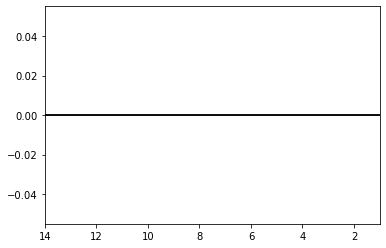

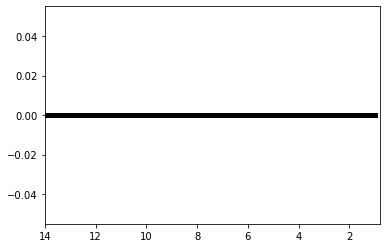

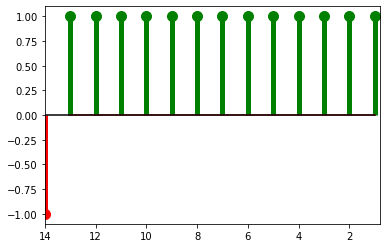

In [4]:
import numpy as np
import experimental_methods as sim
import matplotlib.pyplot as plt

# Define simulation parameters:
N = 14
epsilon = 0; q = 1
mu = 0.5; sigma = 1
R = (100, -100)
c = (1, 1)

# Create time step vector:
t = np.arange(N, 0, -1)

# Simulate realization of reward-maximization strategy:
block = sim.RewardMax(N, mu, sigma, epsilon, q, R, c)
block.experiment_sim()

# Plot reward-maximizing thresholds:
fig, ax = plt.subplots()
ax.plot(t, block.thresh, color='black', label='Decision Thresholds')
ax.plot(t, -block.thresh, color='black')
ax.set_xlim((N, 1))

# Plot belief realization over thresholds:
fig, ax = plt.subplots()
ax.plot(t, block.belief, linewidth=5)
ax.plot(t, block.thresh, 'k', linewidth=5)
ax.plot(t, -block.thresh, 'k', linewidth=5)
ax.set_xlim((N, 0.8))
# ax.set_xticks(np.linspace(N, 1, 4), labels=[])
# ax.set_ylim(np.max(np.abs(ax.get_ylim()))*np.array([-1, 1]))
# ax.set_yticks(np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5), labels=[])
# print(ax.get_yticks())
# ax.spines[['top', 'right']].set_visible(False)

RT_rewarded = block.RT[block.reward == R[0]]
RT_punished = block.RT[block.reward == R[1]]
choice_rewarded = block.choice[block.reward == R[0]]
choice_punished = block.choice[block.reward == R[1]]

# Plot action timeseries representation:
fig, ax = plt.subplots()
if len(RT_rewarded) > 0:
    S = ax.stem(RT_rewarded, choice_rewarded, markerfmt='go', linefmt='green')
    S[0].set_markersize(10); S[1].set_linewidth(5)

if len(RT_punished) > 0:
    S = ax.stem(RT_punished, choice_punished, markerfmt='ro', linefmt='red')
    S[0].set_markersize(10); S[1].set_linewidth(5)
    
ax.plot(t, np.zeros_like(t), color='black')
ax.set_xlim((N, 0.8))
# ax.set_xticks(np.linspace(N, 1, 4), labels=[])
# ax.set_yticks([])
# ax.spines[['top', 'right', 'left']].set_visible(False)
